In [1]:
import numpy as np
import matplotlib.pyplot as plt
from enum import IntEnum

# Roles
class Role(IntEnum):
    Good = 0
    Evil = 1

# Utterances
class Utterance(IntEnum):
    Accuse = 0
    Defend = 1
    Hedge = 2

# Observations
class Observation(IntEnum):
    Accused = 0
    Defended = 1
    Neutral = 2

In [3]:
def run_observation(o, r, u):
    """
    Returns P(o | r, u)
    """
    if u == Utterance.Accuse:
        if r == Role.Evil:
            probs = [0.8, 0.1, 0.1]
        else:
            probs = [0.1, 0.1, 0.8]

    elif u == Utterance.Defend:
        if r == Role.Good:
            probs = [0.1, 0.8, 0.1]
        else:
            probs = [0.1, 0.1, 0.8]

    else:  # Hedge
        probs = [0.33, 0.33, 0.34]

    return probs[o]


In [4]:
def listener(u):
    """
    Returns P(target is Evil | utterance u)
    """
    prior = {
        Role.Good: 0.5,
        Role.Evil: 0.5
    }

    # Assume observation matches utterance index
    o = u

    likelihood_good = run_observation(o, Role.Good, u)
    likelihood_evil = run_observation(o, Role.Evil, u)

    unnorm_good = prior[Role.Good] * likelihood_good
    unnorm_evil = prior[Role.Evil] * likelihood_evil

    norm = unnorm_good + unnorm_evil
    return unnorm_evil / norm


In [5]:
def speaker_strategic(target_role, alpha=5.0):
    """
    Returns P(speaker chooses u | target_role)
    """
    utilities = []

    for u in Utterance:
        p_evil = listener(u)

        if target_role == Role.Evil:
            utility = p_evil           # wants listener to think Evil
        else:
            utility = 1 - p_evil       # wants listener to think Good

        utilities.append(utility)

    utilities = np.array(utilities)
    exp_u = np.exp(alpha * utilities)
    probs = exp_u / exp_u.sum()
    return probs


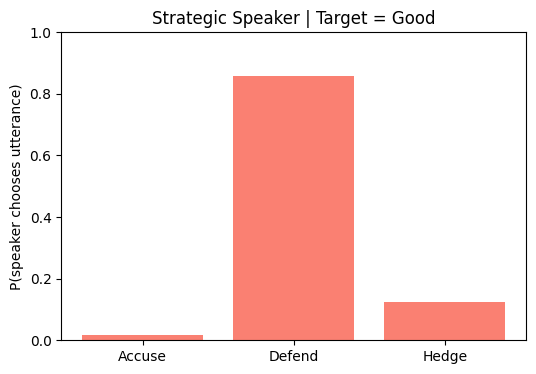

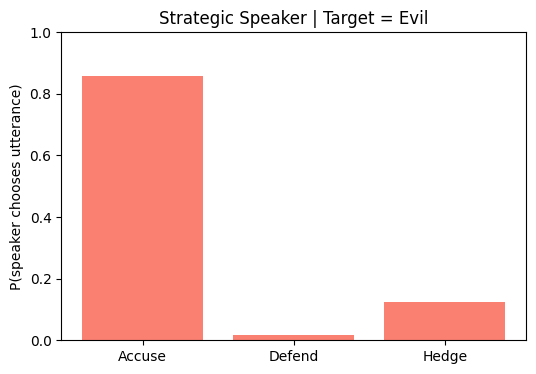

In [6]:
utterance_names = ["Accuse", "Defend", "Hedge"]

for role in [Role.Good, Role.Evil]:
    probs = speaker_strategic(role)

    plt.figure(figsize=(6,4))
    plt.bar(utterance_names, probs, color="salmon")
    plt.ylim(0,1)
    plt.ylabel("P(speaker chooses utterance)")
    plt.title(f"Strategic Speaker | Target = {role.name}")
    plt.show()


In [7]:
for u in Utterance:
    print(f"P(Evil | {u.name}) = {listener(u):.3f}")

P(Evil | Accuse) = 0.889
P(Evil | Defend) = 0.111
P(Evil | Hedge) = 0.500


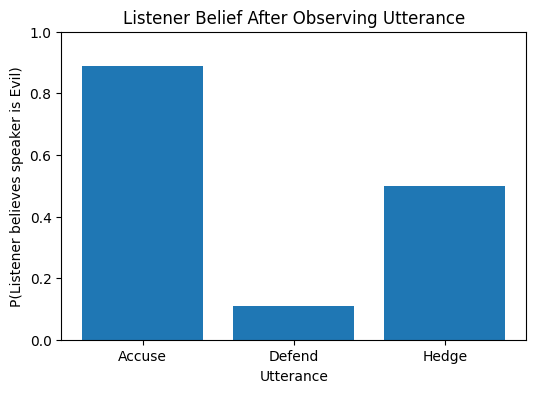

In [10]:
listener_probs = np.array([listener(u) for u in Utterance])

utterance_names = ["Accuse", "Defend", "Hedge"]

plt.figure(figsize=(6,4))
plt.bar(utterance_names, listener_probs)
plt.ylim(0,1)
plt.ylabel("P(Listener believes speaker is Evil)")
plt.xlabel("Utterance")
plt.title("Listener Belief After Observing Utterance")
plt.show()

In [8]:
def speaker_naive(target_role):
    """
    Returns P(speaker chooses u | target_role)
    Naive speaker: uniform over utterances, independent of role.
    """
    num_u = len(Utterance)
    probs = np.ones(num_u) / num_u
    return probs

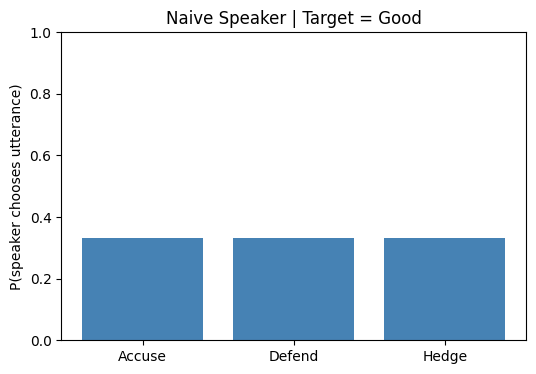

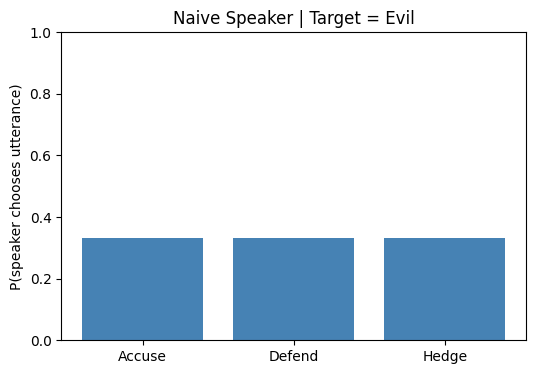

In [9]:
utterance_names = ["Accuse", "Defend", "Hedge"]

for role in [Role.Good, Role.Evil]:
    probs = speaker_naive(role)

    plt.figure(figsize=(6,4))
    plt.bar(utterance_names, probs, color="steelblue")
    plt.ylim(0,1)
    plt.ylabel("P(speaker chooses utterance)")
    plt.title(f"Naive Speaker | Target = {role.name}")
    plt.show()